In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("AndhraPradesh.csv",index_col='Year')

In [19]:
df.head()

,Total
Year,
2001,26175
2002,28999
2003,28185
2004,34040
2005,33555


In [20]:
df.isnull().sum()

Total    0
dtype: int64

In [21]:
df.index

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013],
           dtype='int64', name='Year')

In [22]:
df.index.freq = 'Y'

In [23]:
df.index

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013],
           dtype='int64', name='Year')

In [24]:
df.index.freq

'Y'

In [25]:
df.head()

,Total
Year,
2001,26175
2002,28999
2003,28185
2004,34040
2005,33555


In [27]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
span = 12
alpha = 2/(span+1)

In [29]:
df['EWMA12'] = df['Total'].ewm(alpha=alpha,adjust=False).mean()

In [31]:
df

,Total,EWMA12
Year,,
2001,26175,26175.000000
2002,28999,26609.461538
2003,28185,26851.852071
2004,34040,27957.720983
2005,33555,28818.840832
2006,34210,29648.249935
2007,38037,30938.826868
2008,36909,31857.315042
2009,37976,32798.651189


In [33]:
model = SimpleExpSmoothing(df['Total'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [36]:
fitted_model = model.fit(smoothing_level=alpha,optimized=False)

In [38]:
fitted_model.fittedvalues

Year
2001    26175.000000
2002    26175.000000
2003    26609.461538
2004    26851.852071
2005    27957.720983
2006    28818.840832
2007    29648.249935
2008    30938.826868
2009    31857.315042
2010    32798.651189
2011    34153.320237
2012    34937.117124
2013    35318.945259
dtype: float64

In [39]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [40]:
df.head()

,Total,EWMA12,SES12
Year,,,
2001,26175,26175.000000,26175.000000
2002,28999,26609.461538,26609.461538
2003,28185,26851.852071,26851.852071
2004,34040,27957.720983,27957.720983
2005,33555,28818.840832,28818.840832


In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [42]:
df.plot()

TypeError: index type not supported

In [43]:
df.index = df.index.map(str)

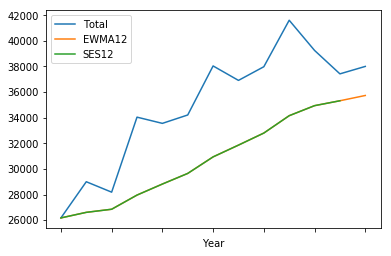

In [44]:
df.plot()

In [45]:
df['DES_add_12'] = ExponentialSmoothing(df['Total'],trend='add').fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [46]:
df

,Total,EWMA12,SES12,DES_add_12
Year,,,,
2001,26175,26175.000000,26175.000000,29554.412742
2002,28999,26609.461538,26609.461538,31149.964833
2003,28185,26851.852071,26851.852071,30656.011714
2004,34040,27957.720983,27957.720983,34441.005746
2005,33555,28818.840832,28818.840832,35733.203543
2006,34210,29648.249935,29648.249935,36268.094039
2007,38037,30938.826868,30938.826868,39025.675399
2008,36909,31857.315042,31857.315042,39151.877262
2009,37976,32798.651189,32798.651189,39447.508266


TypeError: index type not supported

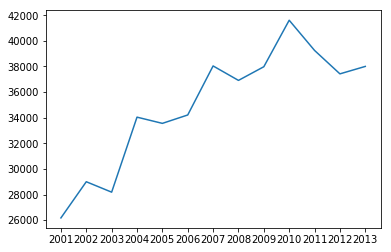

In [80]:
df.plot()
plot.savefig("DES_ADD.")

In [48]:
df['DES_mul_12'] = ExponentialSmoothing(df['Total'],trend='mul').fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [49]:
df

,Total,EWMA12,SES12,DES_add_12,DES_mul_12
Year,,,,,
2001,26175,26175.000000,26175.000000,29554.412742,29658.756124
2002,28999,26609.461538,26609.461538,31149.964833,31403.195262
2003,28185,26851.852071,26851.852071,30656.011714,30925.913061
2004,34040,27957.720983,27957.720983,34441.005746,34843.873240
2005,33555,28818.840832,28818.840832,35733.203543,36181.923441
2006,34210,29648.249935,29648.249935,36268.094039,36656.342027
2007,38037,30938.826868,30938.826868,39025.675399,39398.438879
2008,36909,31857.315042,31857.315042,39151.877262,39439.058413
2009,37976,32798.651189,32798.651189,39447.508266,39629.018183


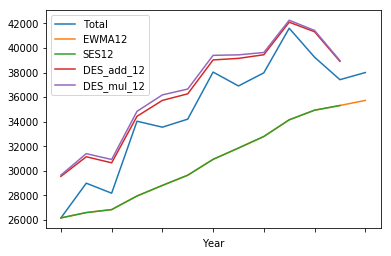

In [50]:
df.plot()

In [51]:
df['TES_mul_12'] = ExponentialSmoothing(df['Total'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


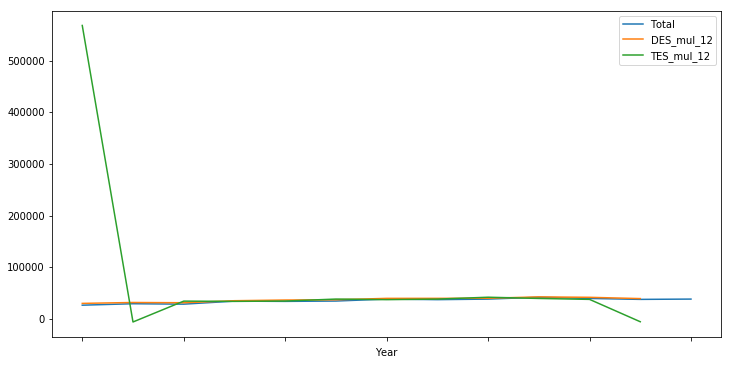

In [58]:
df[['Total','DES_mul_12','TES_mul_12']].plot(figsize=(12,6))

In [75]:
df.index.freq = 'Y'

In [79]:
pred = model.predict(start=df.index[0],end=df.index[-1])

TypeError: predict() missing 1 required positional argument: 'params'